# Getting and Knowing your Data

#### All credit goes to the follow:


Check out Chipotle Exercises Video Tutorial to watch a data scientist go through the exercises

This time we are going to pull data directly from the internet. Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

## Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

## Step 2. Import the Data set comes from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv)

## Step 3. Assign it to a variable called chipo_lay of df to keep it short

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df = pd.read_csv(url, sep= '\t')


**To be able to read this file we had to add the sep atribute with a tab dilimiter. Documentation is locted here:**

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

## Step 4. See the first 20 entries

In [3]:
df.head(20)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


## Step 5. What is the number of observations (rows) in the dataset?

In [4]:
# solution 1 get both rows, columns (4622, 5)
df.shape

(4622, 5)

In [5]:
# solution 2 get just the rows 4622
df.shape[0]

4622

In [6]:
# solution 3 get the info or series outlook
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


## Step 6. What is the number of columns in the dataset?

In [7]:
df.shape[1] # gets columns

5

 ## Step 7. Print the name of all the columns.

In [8]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

***The dataframes I work with can be big so sometime i will turn those columns into a list, so they do not get truncated***
see example below. Then we can CTRL + F and find the colmun we need.
Another eay is to use pd.set_options() to change our display settings. To save RAM I will not do that on the data

In [9]:
df.columns.to_list() # makes a list of the column headings

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

## Step 8. How is the dataset indexed?

In [10]:
df.index

RangeIndex(start=0, stop=4622, step=1)

## Step 9. Which was the most-ordered item?

In [11]:
# group the data by the item name then sum all the values, sort them by quanity and put the highest value you at the top
c = df.groupby("item_name").sum().sort_values(['quantity'], ascending=False)
c.head(5) # print the top 5 values         

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


Chicken Bowl
## Step 10. For the most-ordered item, how many items were ordered?
761

## Step 11. What was the most ordered item in the choice_description column?

In [12]:
c = df.groupby("choice_description").sum().sort_values(['quantity'], ascending=False)
c.head()
# Diet Coke: 123455, 159

,order_id,quantity
choice_description,,
[Diet Coke],123455,159
[Coke],122752,143
[Sprite],80426,89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",43088,49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",36041,42


## Step 12. How many items were orderd in total?

In [13]:
total_items = df['quantity'].sum() # i do not like to use . (dot) notation.
total_items

4972

## Step 13. Turn the item price into a float
### Step 13.a. Check the item price type

In [14]:
df['item_price'].dtype

dtype('O')

### Step 13.b. Create a lambda function and change the type of item price

In [15]:
var = lambda x: float(x[1: -1]) # I am not to fimailr with lambda usage yet so this is here for referance
# this fuction is saying make x a float from 1st to last row
df["item_price"] = df["item_price"].apply(var)

##### Lambda overview and documentation

The expression lambda parameters: expression yields a function object. The unnamed object behaves like a function object defined with:

def <lambda>(parameters):
    
    return expression

https://docs.python.org/3/reference/expressions.html

### Step 13.b. (my way learn more on why this does not work at this level. Further down has a way to make it work)
* Use the astype() Method to Convert Object to Float in Pandas
or
* Use the to_numeric() Function to Convert Object to Float in Pandas

The Pandas to_numeric() function can be used to convert a list, a series, an array, or a tuple to a numeric datatype, which means signed, or unsigned int and float type. It also has the errors parameter to raise exceptions. An example of converting the object type to float using to_numeric() is shown below:

In [16]:
dfilt2 = df["item_price"]
dfilt2 = pd.to_numeric(df["item_price"], errors = 'ignore')

# this makes all my ROW values NaN. Unknown why not just empty columns
# here is why:
# errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’

# If ‘raise’, then invalid parsing will raise an exception
# If ‘coerce’, then invalid parsing will be set as NaN
# If ‘ignore’, then invalid parsing will return the input

# none of these can get ride of the $ and make it a float. Either error, NaN, or stays the same.

In [17]:
dfilt2

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

If any of your columns don't have a number then it will be converted to NaN... 
so be careful while using it.

***documentation is located here:***
https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_numeric.html

 ### documentation for astype()
 
 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

In [18]:
dlit = df["item_price"]
dlit = df.item_price.astype(float, errors='ignore') # use ignore to pass special chars like $. but keeps it as a float

# same as above. Seem like because of the $ symbol these two method do not worng yet...

### Step 13.c. Check the item price type

In [19]:
dlit.head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

## Bonus
To get the above two to work. will use replace method to pracetice

***replace does full replacement searches, unless you turn on the regex switch. Use regex=True, and it should perform partial replacements as well.***

In [21]:
dlit2 = df["item_price"]
dlit2 = dlit2.replace("$", "", regex=True)
dlit2

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

# Step 14. How much was the revenue for the period in the dataset?

In [26]:
profit = (df['quantity'] * df['item_price']).sum() # don't forget to put () around your condition before .sum() or your data will not be correct
print("Revenue was: $:" + str(np.round(profit,2)))

Revenue was: $:39237.02


# Step 15. How many orders were made in the period?

In [27]:
# set this variable to the value counts of each order id, then count the total numbers of each differnt value
# to get the total number of order id's counted

num_orders = df['order_id'].value_counts().count() 
num_orders

1834

# Step 16. What is the average revenue amount per order?

In [28]:
df['profit'] = df['quantity'] * df['item_price']
grouped = df.groupby(by= ['order_id']).sum()
grouped.mean()['profit']

21.39423118865867

In [29]:
# to run this code, same as above, but the df['profit'] part has to be done seperately to make it work
df.groupby(by=['order_id']).sum().mean()['profit']

21.39423118865867

# Step 17. How many different items are sold?

In [51]:
df['item_name'].value_counts()


Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

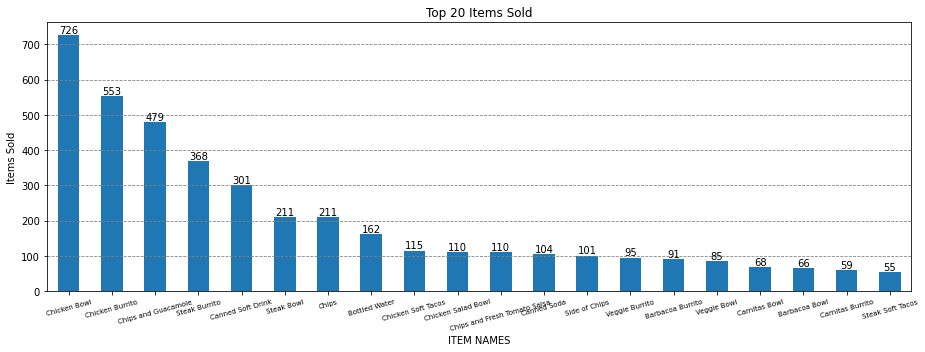

In [92]:
import matplotlib.pyplot as plt

df_index = df['item_name'].value_counts(ascending=False).head(20)
df_index.plot(kind='bar', figsize=(13,5))

for i in range(len(df_index)):
    plt.text(i, df_index[i], df_index[i], ha='center', va='bottom')
plt.xticks(rotation=15)
plt.ylabel("Items Sold")
plt.xlabel('ITEM NAMES')
plt.title('Top 20 Items Sold')
plt.grid(color='gray', linestyle='--', axis='y')
plt.tick_params(axis='x', labelsize= 7)
plt.tight_layout()
plt.show()